## Importing Data Notebook

Code sources:
- https://github.com/dlab-berkeley/Geospatial-Fundamentals-in-Python/blob/master/Geopandas_Intro_F2019_GC.ipynb
- https://rasterio.readthedocs.io/en/stable/

Install libraries

In [9]:
# Install rasteria
!pip install rasterio

  Using cached https://files.pythonhosted.org/packages/1a/6d/ee8b15e0d45dd7e9e7f2559e37f91915a19155cf8403948ff2082903ee30/rasterio-1.1.0.tar.gz
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Complete output from command C:\Users\theaa\AppData\Local\Continuum\anaconda3\python.exe C:\Users\theaa\AppData\Local\Continuum\anaconda3\lib\site-packages\pip install --ignore-installed --no-user --prefix C:\Users\theaa\AppData\Local\Temp\pip-build-env-iqx33yr_\overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel cython numpy:
  Traceback (most recent call last):
    File "C:\Users\theaa\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Users\theaa\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\theaa\AppData\Local\Continuum\anacon

Command "C:\Users\theaa\AppData\Local\Continuum\anaconda3\python.exe C:\Users\theaa\AppData\Local\Continuum\anaconda3\lib\site-packages\pip install --ignore-installed --no-user --prefix C:\Users\theaa\AppData\Local\Temp\pip-build-env-iqx33yr_\overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel cython numpy" failed with error code 1 in None


In [3]:
# Install pysal
!pip install pysal

  Using cached https://files.pythonhosted.org/packages/8e/c6/ed0ca4fd0a72c4cfa629e2e88b8f6f77b2d32ae6cf1678ecf6ef392320ab/pysal-2.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/e5/b6/1ed2eb03989ae574584664985367ba70cd9cf8b32ee8cad0e8aaeac819f3/descartes-1.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ca/46/5198aa24e61bb7eef28d06cb69e56bfa1942f4b6807d95a0b5ce361fe09b/palettable-3.3.0-py2.py3-none-any.whl
  Stored in directory: C:\Users\theaa\AppData\Local\pip\Cache\wheels\d3\83\3d\697615f4ce74486679f237d1d6a1cf70cd742fa6a34baba744
Successfully built pysal


In [4]:
# Install mapclassify
!pip install mapclassify

In [1]:
# Install Geopandas
!pip install geopandas

In [1]:
# Install descartes - Geopandas requirment
!pip install descartes

Import libraries

In [10]:
import pandas as pd
import geopandas as gpd
import mapclassify
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

ModuleNotFoundError: No module named 'rasterio'

Set directory

In [3]:
import os

In [4]:
path = 'C:\\Users\\theaa\\Desktop\\Data Science Pedagogy Resources\\Python\\Human_Mobility_Project\\Human_Mobility_Project'
os.chdir(path)

Save the files as an object list `myfiles`

In [ ]:
ls

In [5]:
data_path = path + '\\data\\raw_data'
os.chdir(data_path)

Unzip the data files

In [ ]:
# for f in myfiles:
#  print("Unzipping: ", f)
unzip {myfiles}

Read in country borders shapefile

In [6]:
usa1810 = gpd.read_file("World Country Borders/ne_50m_admin_0_countries.shp")  #US counties in 1810

Map out borders

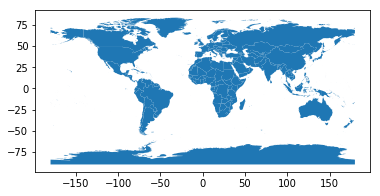

In [7]:
usa1810.plot()  # it's really that simple!

In [8]:
dataset = rasterio.open('TravelTime_50k\\Traveltime_50k.tif')

NameError: name 'rasterio' is not defined